# Examples

Included here are examples that demonstrate sample usage of various benchmarking tools (and that also serve as sanity checks, to demonstrate that the code behaves as expected).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/benchmark
!ls

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/benchmark
Examples.ipynb	      MakeGroundTruth.ipynb  RandomRenderer.py
fonts		      pdf_make.py	     text_chunk.py
ground_truth_scratch  __pycache__	     web_walk.py


In [ ]:
!apt-get install -y --no-install-recommends g++ protobuf-compiler libprotobuf-dev
!pip install gcld3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libprotobuf-dev is already the newest version (3.0.0-9.1ubuntu1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!pip install fonttools

     |████████████████████████████████| 870 kB 7.8 MB/s 


## RandomRenderer

Render images with random orientation, font, font size, coloring.

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os
from scipy import stats
from fontTools.ttLib import TTFont
from numpy.random import default_rng

from RandomRenderer import RandomRenderer

In [ ]:
# Your fonts directory may be different depending on your machine.
rr = RandomRenderer(rng=default_rng(2304), fonts_dir='/usr/share/fonts')

In [ ]:
sample_text = '''['/usr/share/fonts/truetype/lohit-punjabi/Lohit-Gurmukhi.ttf',
  '/usr/share/fonts/truetype/Sarai/Sarai.ttf',
  '/usr/share/fonts/truetype/sinhala/lklug.ttf',
  '/usr/share/fonts/truetype/Gargi/Gargi.ttf',
  '/usr/share/fonts/truetype/lohit-tamil-classical/Lohit-Tamil-Classical.ttf',
  '/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-Regular.ttf',
  '/usr/share/fonts/truetype/pagul/Pagul.ttf',
  '/usr/share/fonts/truetype/fonts-kalapi/Kalapi.ttf',
  '/usr/share/fonts/truetype/lohit-telugu/Lohit-Telugu.ttf',
  '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
  '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
  '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
  '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
  '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
  '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf'''

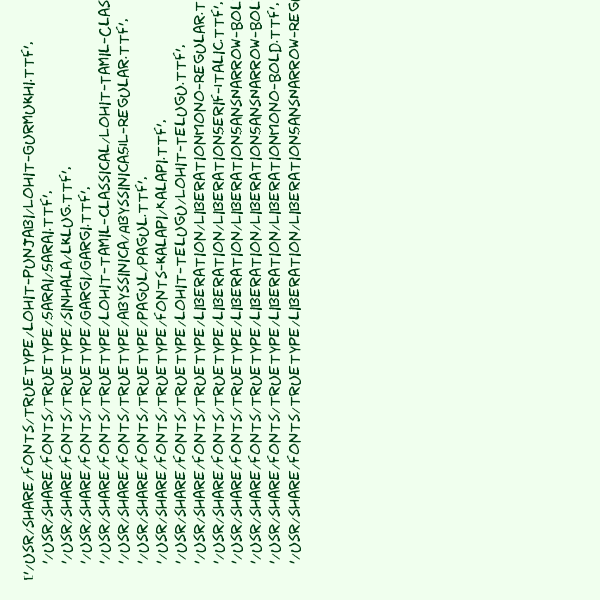

In [ ]:
rr.render(sample_text)

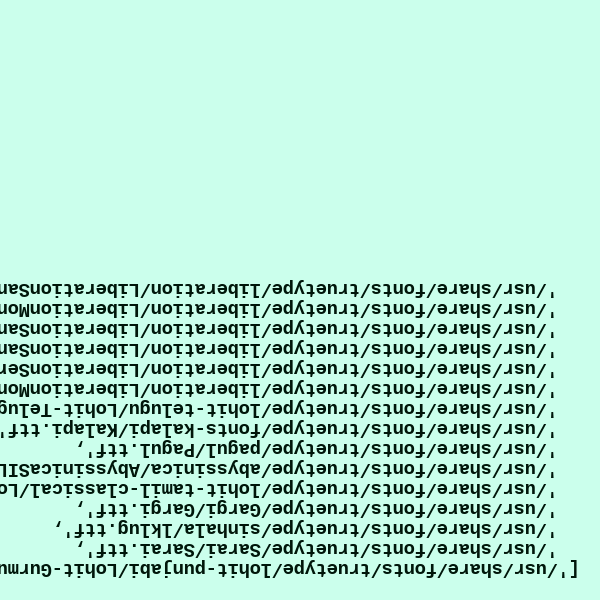

In [ ]:
rr.render(sample_text)

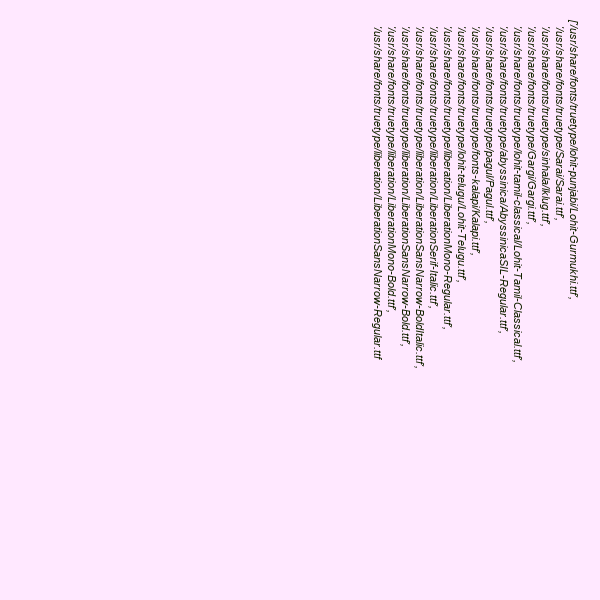

In [ ]:
rr.render(sample_text)

In [ ]:
rr.choices

{'background_color': [(240, 255, 238, 0),
  (203, 255, 236, 0),
  (255, 232, 255, 0)],
 'font': ['Humor-Sans', 'LiberationMono-Bold', 'LiberationSans-Italic'],
 'fontsize': [16, 19, 11],
 'foreground_color': [(0, 60, 20), (0, 22, 10), (20, 35, 0)],
 'orientation': [90, 180, 270]}

## WebWalk

Traverse the Internet via hyperlinks.


In [ ]:
from web_walk import *
from numpy.random import default_rng

In [ ]:
result = web_walk(
    start=wikipedia_about_page('en'),
    desired_text_len=int(3e5),
    rng=default_rng(1539),
    language='en',
    websites={wikipedia('en')},
    fringe_size=5,
    url_resolver=get_query_string_remover(get_prefixer('https://en.wikipedia.org')),
    verbose=True
)

Visiting https://en.wikipedia.org/wiki/Wikipedia:About...
Visiting https://en.wikipedia.org/wiki/Russian_language...
Visiting https://en.wikipedia.org/wiki/Wikipedia:Wikimedia_Foundation...
Visiting https://en.wikipedia.org/wiki/Wikipedia:Copyrights...
Visiting https://en.wikipedia.org/wiki/Wikipedia:Help_desk...
Visiting https://en.wikipedia.org/wiki/Wikipedia:Contents...
Visiting https://en.wikipedia.org/wiki/Runet...
Visiting https://en.wikipedia.org//en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License...
Visiting https://en.wikipedia.org/wiki/User:ProcrastinatingReader...
Visiting https://en.wikipedia.org/wiki/Wikipedia:GNG...
Visiting https://en.wikipedia.org/wiki/Slang...
Visiting https://en.wikipedia.org/wiki/Context_(language_use)...
Visiting https://en.wikipedia.org/wiki/Martin_Walker_(reporter)...
Visiting https://en.wikipedia.org/wiki/Category:Use_mdy_dates_from_February_2019...
Visiting https://en.wikipedia.org/wiki/English_o

In [ ]:
result[-3000:-2000]

'Kong who got 777 votes in the 2017 Hong Kong Chief Executive Election.\nMr. Rubbish Bin: This refers to Mr. Lau Kong Wah, an infamous former legislative council member. He was given the name after the photo parody of his inability to speak a word during the HKFS-government conference when the Umbrella Revolution happened.[5][6]\nMr. 4PM: This refers to Mr. Hui Chun Tak, Steve, the chief superintendent of Police of the Police Public Relations Bureau. He was given the name due to his regular appearance (4:00\xa0p.m.)in everyday police press conference in the course of Umbrella Revolution.[7]\nYellow ribbon (黃絲帶 wong4si1daai3): It refers to people who are in a supporting stance during Umbrella Revolution.\nBlue ribbon (藍絲帶 laam4si1daai3): It refers to people who support police force to strictly enforce the law when Umbrella Revolution took place.\nSee also[edit]\nChinese Internet Slang\nInternet Slang\nCantonese Slang\nReferences[edit]\n\n\n^ Luk, Sau-ling. "The Use of Cantonese Slang by

In [ ]:
result2 = web_walk(
    start=wikipedia_about_page('zh'),
    desired_text_len=int(3e5),
    rng=default_rng(1539),
    language=None,
    websites={wikipedia('zh')},
    fringe_size=5,
    url_resolver=get_query_string_remover(get_prefixer('https://zh.wikipedia.org')),
    verbose=True
)

Visiting https://zh.wikipedia.org/wiki/Wikipedia:About...
Visiting https://zh.wikipedia.org/wiki/Wikipedia:%E6%95%B0%E6%8D%AE%E5%BA%93%E4%B8%8B%E8%BD%BD...
Visiting https://zh.wikipedia.org/wiki/%E6%96%87%E5%8C%96...
Visiting https://zh.wikipedia.org/wiki/GNU%E8%87%AA%E7%94%B1%E6%96%87%E6%A1%A3%E8%AE%B8%E5%8F%AF%E8%AF%81...
Visiting https://zh.wikipedia.org//donate.wikimedia.org/wiki/Tax_deductibility...
Visiting https://zh.wikipedia.org/wiki/Wikipedia:%E7%BB%B4%E5%9F%BA%E7%99%BE%E7%A7%91%E6%8B%B7%E8%B4%9D%E7%BD%91%E7%AB%99...
Visiting https://zh.wikipedia.org/wiki/%E8%AA%9E%E6%BA%90%E5%AD%B8...
Visiting https://zh.wikipedia.org/wiki/%E6%B6%B5%E5%8C%96...
Visiting https://zh.wikipedia.org/wiki/%E4%BA%92%E8%81%94%E7%BD%91%E6%A1%A3%E6%A1%88%E9%A6%86...
Visiting https://zh.wikipedia.org/wiki/%E9%AD%8F%E5%AD%90%E5%AE%89...
Visiting https://zh.wikipedia.org/wiki/%E5%B8%8C%E8%87%98%E6%96%87%E5%8C%96...
Visiting https://zh.wikipedia.org/wiki/%E6%96%B0%E5%8F%A4%E5%85%B8%E4%B8%BB%E7%BE%A9...
Vi

In [ ]:
result2[-3000:-2000]

'\n\n\n\n\n\n\n\n\n搜索\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n 本页面最后修订于2020年12月4日 (星期五) 12:18。\n本站的全部文字在知识共享 署名-相同方式共享 3.0协议之条款下提供，附加条款亦可能应用。（请参阅使用条款）\nWikipedia®和维基百科标志是维基媒体基金会的注册商标；维基™是维基媒体基金会的商标。\n维基媒体基金会是按美国国內稅收法501(c)(3)登记的非营利慈善机构。\n\n\n隐私政策\n关于维基百科\n免责声明\n手机版视图\n开发者\n统计\nCookie声明\n\n\n\n\n\n\n\n\n\n\n\n\n\n1,16-二溴十六烷 - 维基百科，自由的百科全书\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n1,16-二溴十六烷\n\n维基百科，自由的百科全书\n\n\n\n跳到导航\n跳到搜索\n\n1,16-二溴十六烷是一种有机溴化合物，化学式为C16H32Br2。1,16-二溴十六烷可由NBS（或四溴化碳[3]）和1,16-十六烷二醇在三苯基膦的存在下反应制得。[4]它和碘化钠在丙酮中回流，可以得到1,16-二碘十六烷；[5]它和氰化钠在二甲基亚砜中加热反应，得到1,18-十八烷二腈。[6]\n\n参考文献[编辑]\n\n\n^ R.G. Woolford. THE ELECTROLYSIS OF ω-BROMOCARBOXYLIC ACIDS. Canadian Journal of Chemistry. 1962-09-01, 40 (9): 1846–1850  [2020-11-16]. ISSN\xa00008-4042. doi:10.1139/v62-280 （英语）.\xa0\n\n^ Alexander K.L. Yuen, Falk Heinroth, Antony J. Ward, Anthony F. Masters, Thomas Maschmeyer. Novel bis(methylimidazolium)alkane bolaamphiphiles as tem

## TextChunk

Break text into passage-sized, page-sized, line-sized pieces.

In [ ]:
from numpy.random import default_rng
from text_chunk import *

In [ ]:
sample_text = ''.join(char * (5000 + i * 500) for i, char in enumerate('abcdefg'))
sample_text

'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [ ]:
chunker = get_chunker(default_rng(1043))

for page in chunker(sample_text):
  print(page)

ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
fffffffffffffffffffffggggggggggggggggggggggggggggggggggggggg
gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg
gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg
gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg
gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg
gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg
gggggggggggggggggggggggg